### time series data structure

In [3]:
import pandas as pd

데이터를 살펴보기 전에 날짜와 시간 작업을 위한 기본 pandas 데이터 구조를 간략하게 살펴보겠습니다. 

pandas 에서 시간의 단일 지점은 타임 스탬프로 표현됩니다. 후에 시계열과 같은 데이터를 사용할 때 날짜, 시간 형식의 다양한 문자열에서 타임 스탬프를 만들 수있는 to_datetime() 함수를 사용할 수 있습니다. 

In [4]:
pd.to_datetime('2018-01-15 3:45pm')

Timestamp('2018-01-15 15:45:00')

In [5]:
pd.to_datetime('7/8/1952')

Timestamp('1952-07-08 00:00:00')

In [6]:
pd.to_datetime('7/8/1952', dayfirst=True)

Timestamp('1952-08-07 00:00:00')

to_datetime() 에 입력으로 문자열의 목록 또는 배열을 제공하는 경우, pandas 시계열 기능의 핵심 데이터 구조인 DateTimeIndex 객체에서 날짜, 시간 값의 시퀀스를 반환합니다.

In [8]:
pd.to_datetime(['2018-01-05 3:45pm', '7/8/1952', 'Oct 10, 1995'])

DatetimeIndex(['2018-01-05 15:45:00', '1952-07-08 00:00:00',
               '1995-10-10 00:00:00'],
              dtype='datetime64[ns]', freq=None)

위의 날짜 시간 인덱스에서 datetime64 [ns] 데이터 형식은 기본 데이터가 나노초 (ns) 단위로 64비트 정수로 저장됨을 나타냅니다. 이 데이터 구조를 통해 팬더는 날짜, 시간 값의 큰 시퀀스를 콤팩트하게 저장하고 NumPy datetime64 배열을 사용하여 벡터화 된 연산을 효율적으로 수행 할 수 있습니다.

In [9]:
pd.to_datetime(['2/25/10', '8/6/17', '12/15/12'], format='%m/%d/%y')

DatetimeIndex(['2010-02-25', '2017-08-06', '2012-12-15'], dtype='datetime64[ns]', freq=None)

### Create Open Power System Data
##### (Reference: https://github.com/Open-Power-System-Data/time_series)

In [10]:
raw_df = pd.read_csv('time_series_60min_singleindex_sub_aa.csv')

In [11]:
raw_df.head(5)

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN


In [12]:
raw_df.shape

(50401, 300)

In [13]:
raw_df.tail(5)

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
50396,2020-09-30T19:00:00Z,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30T20:00:00Z,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30T21:00:00Z,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30T22:00:00Z,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN
50400,2020-09-30T23:00:00Z,2020-10-01T01:00:00+0200,5395.0,5204.0,NaN,NaN,1661.0,7837.0,7943.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
raw_df.dtypes

utc_timestamp                            object
cet_cest_timestamp                       object
AT_load_actual_entsoe_transparency      float64
AT_load_forecast_entsoe_transparency    float64
AT_price_day_ahead                      float64
                                         ...   
SK_load_forecast_entsoe_transparency    float64
SK_solar_generation_actual              float64
SK_wind_onshore_generation_actual       float64
UA_load_actual_entsoe_transparency      float64
UA_load_forecast_entsoe_transparency    float64
Length: 300, dtype: object

### subset of data

In [21]:
raw_df.filter(regex='^[AT_]')

,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual
0,NaN,NaN,NaN,NaN,NaN
1,5946.0,6701.0,35.0,NaN,69.0
2,5726.0,6593.0,45.0,NaN,64.0
3,5347.0,6482.0,41.0,NaN,65.0
4,5249.0,6454.0,38.0,NaN,64.0
...,...,...,...,...,...
50396,6661.0,6656.0,NaN,NaN,1847.0
50397,6336.0,6310.0,NaN,NaN,1723.0
50398,5932.0,5813.0,NaN,NaN,1771.0
50399,5628.0,5424.0,NaN,NaN,1779.0


In [26]:
raw_df.columns

Index(['utc_timestamp', 'cet_cest_timestamp',
       'AT_load_actual_entsoe_transparency',
       'AT_load_forecast_entsoe_transparency', 'AT_price_day_ahead',
       'AT_solar_generation_actual', 'AT_wind_onshore_generation_actual',
       'BE_load_actual_entsoe_transparency',
       'BE_load_forecast_entsoe_transparency', 'BE_solar_generation_actual',
       ...
       'SI_load_actual_entsoe_transparency',
       'SI_load_forecast_entsoe_transparency', 'SI_solar_generation_actual',
       'SI_wind_onshore_generation_actual',
       'SK_load_actual_entsoe_transparency',
       'SK_load_forecast_entsoe_transparency', 'SK_solar_generation_actual',
       'SK_wind_onshore_generation_actual',
       'UA_load_actual_entsoe_transparency',
       'UA_load_forecast_entsoe_transparency'],
      dtype='object', length=300)

In [34]:
raw_df[['utc_timestamp','AT_load_actual_entsoe_transparency','AT_load_forecast_entsoe_transparency','AT_price_day_ahead','AT_solar_generation_actual','AT_wind_onshore_generation_actual']]

,utc_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual
0,2014-12-31T23:00:00Z,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,5946.0,6701.0,35.0,NaN,69.0
2,2015-01-01T01:00:00Z,5726.0,6593.0,45.0,NaN,64.0
3,2015-01-01T02:00:00Z,5347.0,6482.0,41.0,NaN,65.0
4,2015-01-01T03:00:00Z,5249.0,6454.0,38.0,NaN,64.0
...,...,...,...,...,...,...
50396,2020-09-30T19:00:00Z,6661.0,6656.0,NaN,NaN,1847.0
50397,2020-09-30T20:00:00Z,6336.0,6310.0,NaN,NaN,1723.0
50398,2020-09-30T21:00:00Z,5932.0,5813.0,NaN,NaN,1771.0
50399,2020-09-30T22:00:00Z,5628.0,5424.0,NaN,NaN,1779.0


### Quiz????

데이터 세트에는 2006-2017년 독일 전국적 전력 소비, 풍력 발전 및 태양광 생산 총계가 포함됩니다.

In [35]:
opsd_daily_df = pd.read_csv('opsd_germany_daily.csv')

In [36]:
opsd_daily_df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [38]:
opsd_daily_df.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [39]:
opsd_daily_df.shape

(4383, 5)

In [41]:
opsd_daily_df.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

### Time-based indexing

In [42]:
opsd_daily_df = opsd_daily_df.set_index('Date')
opsd_daily_df.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


In [57]:
# Converting the index as date
opsd_daily_df.index = pd.to_datetime(opsd_daily_df.index)

다음과 같은 방식으로 데이터를 읽어 들일때 인덱스를 잡아줄 수 있습니다.
opsd_daily = pd.read_csv('opsd_germany_daily.csv', index_col=0, parse_dates=True)

In [75]:
opsd_daily_df['Year'] = opsd_daily_df.index.year
opsd_daily_df['Month'] = opsd_daily_df.index.month
opsd_daily_df['Weekday Name'] = opsd_daily_df.index.day_name()
# Display a random sampling of 5 rows
opsd_daily_df.sample(5, random_state = 0)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2008-08-23,1152.011,NaN,NaN,NaN,2008,8,Saturday
2013-08-08,1291.984,79.666,93.371,173.037,2013,8,Thursday
2009-08-27,1281.057,NaN,NaN,NaN,2009,8,Thursday
2015-10-02,1391.050,81.229,160.641,241.870,2015,10,Friday
2009-06-02,1201.522,NaN,NaN,NaN,2009,6,Tuesday


In [77]:
opsd_daily_df.loc['2017-08-10']

Consumption      1351.49
Wind             100.274
Solar              71.16
Wind+Solar       171.434
Year                2017
Month                  8
Weekday Name    Thursday
Name: 2017-08-10 00:00:00, dtype: object

In [78]:
opsd_daily_df.loc['2014-01-20':'2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [79]:
opsd_daily_df.loc['2012-02']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday
2012-02-06,1574.766,34.896,55.389,90.285,2012,2,Monday
2012-02-07,1615.078,100.312,19.867,120.179,2012,2,Tuesday
2012-02-08,1613.774,93.763,36.930,130.693,2012,2,Wednesday
2012-02-09,1591.532,132.219,19.042,151.261,2012,2,Thursday


### Visualizing time series data

In [80]:
import matplotlib.pyplot as plt
# Display figures inline in Jupyter notebook

In [81]:
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})

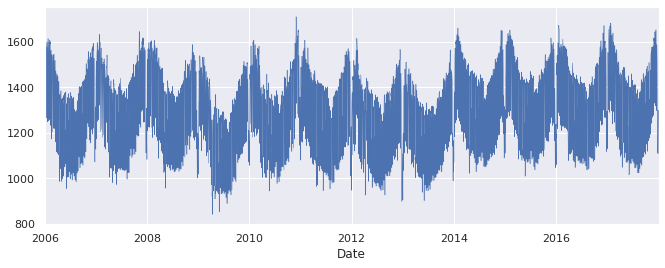

In [82]:
opsd_daily_df['Consumption'].plot(linewidth=0.5);

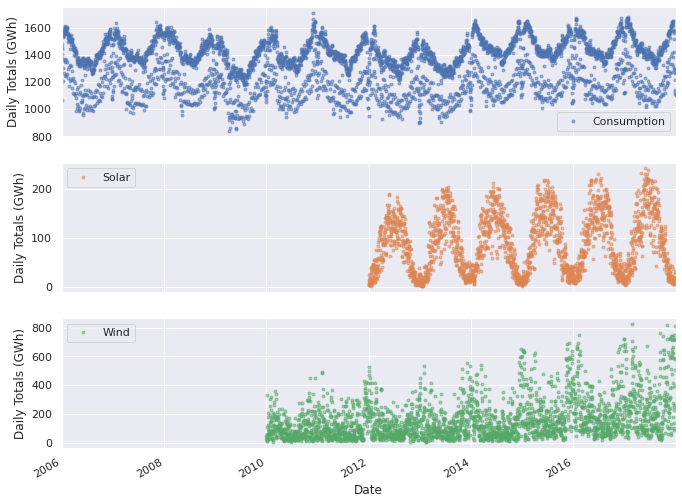

In [83]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily_df[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

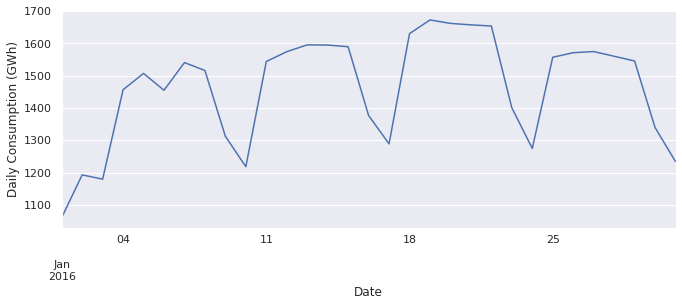

In [91]:
ax = opsd_daily_df.loc['2016-01', 'Consumption'].plot()
ax.set_ylabel('Daily Consumption (GWh)');

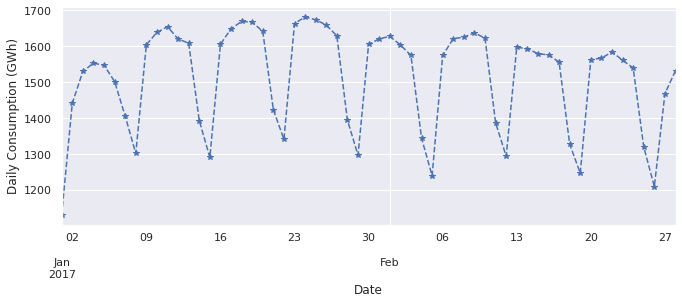

In [90]:
ax = opsd_daily_df.loc['2017-01':'2017-02', 'Consumption'].plot(marker='*', linestyle='--')
ax.set_ylabel('Daily Consumption (GWh)');

#### Customizing time series plots

In [92]:
import matplotlib.dates as mdates

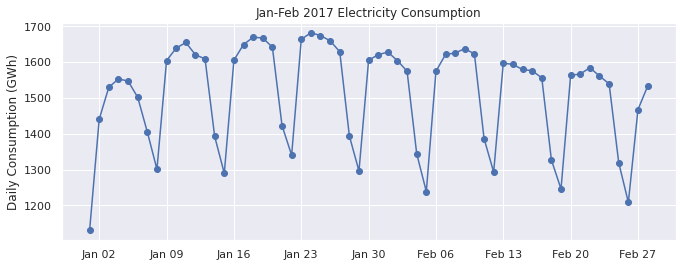

In [94]:
fig, ax = plt.subplots()
ax.plot(opsd_daily_df.loc['2017-01':'2017-02', 'Consumption'], marker='o', linestyle='-')
ax.set_ylabel('Daily Consumption (GWh)')
ax.set_title('Jan-Feb 2017 Electricity Consumption')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

#### Seasonality

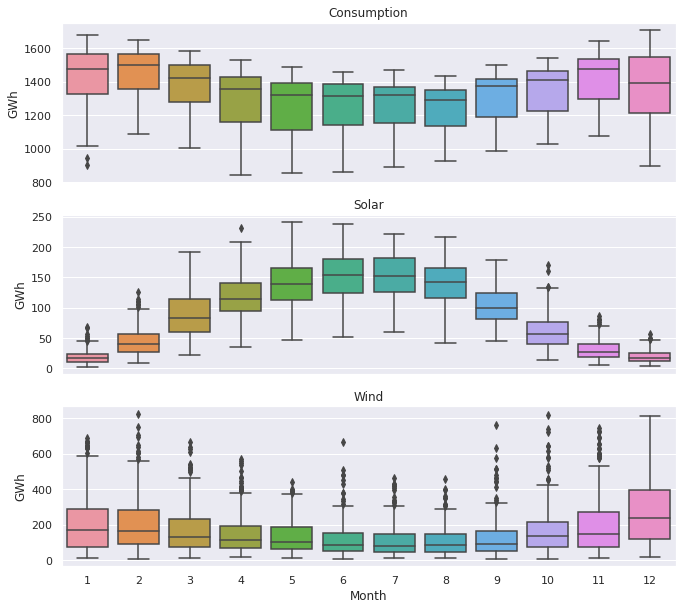

In [97]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Consumption', 'Solar', 'Wind'], axes):
    sns.boxplot(data=opsd_daily_df, x='Month', y=name, ax=ax)
    ax.set_ylabel('GWh')
    ax.set_title(name)
# Remove the automatic x-axis label from all but the bottom subplot
    if ax != axes[-1]:
        ax.set_xlabel('')

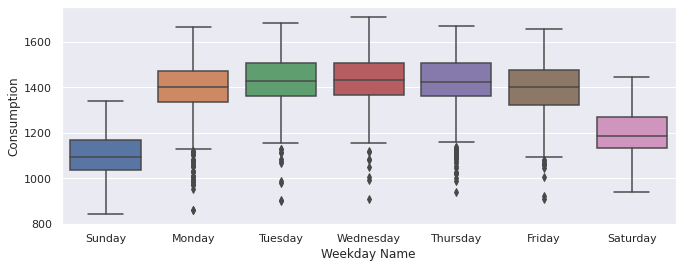

In [98]:
sns.boxplot(data=opsd_daily_df, x='Weekday Name', y='Consumption');

#### frequencies

In [99]:
pd.date_range('1998-03-10', '1998-03-15', freq='D')

DatetimeIndex(['1998-03-10', '1998-03-11', '1998-03-12', '1998-03-13',
               '1998-03-14', '1998-03-15'],
              dtype='datetime64[ns]', freq='D')

In [100]:
pd.date_range('2004-09-20', periods=8, freq='H')

DatetimeIndex(['2004-09-20 00:00:00', '2004-09-20 01:00:00',
               '2004-09-20 02:00:00', '2004-09-20 03:00:00',
               '2004-09-20 04:00:00', '2004-09-20 05:00:00',
               '2004-09-20 06:00:00', '2004-09-20 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [101]:
opsd_daily_df.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [103]:
# To select an arbitrary sequence of date/time values from a pandas time series,
# we need to use a DatetimeIndex, rather than simply a list of date/time strings
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])
# Select the specified dates and just the Consumption column
consum_sample = opsd_daily_df.loc[times_sample, ['Consumption']].copy()
consum_sample

,Consumption
2013-02-03,1109.639
2013-02-06,1451.449
2013-02-08,1433.098


In [104]:
# Convert the data to daily frequency, without filling any missings
consum_freq = consum_sample.asfreq('D')
# Create a column with missings forward filled
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


#### Resampling

In [105]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
# Resample to weekly frequency, aggregating with mean
opsd_weekly_mean = opsd_daily_df[data_columns].resample('W').mean()
opsd_weekly_mean.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN


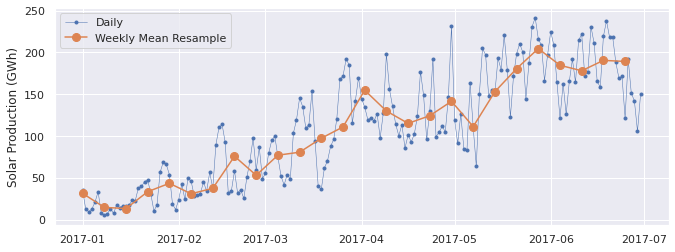

In [106]:
# Start and end of the date range to extract
start, end = '2017-01', '2017-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(opsd_daily_df.loc[start:end, 'Solar'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(opsd_weekly_mean.loc[start:end, 'Solar'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Solar Production (GWh)')
ax.legend();

In [107]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
opsd_monthly = opsd_daily_df[data_columns].resample('M').sum(min_count=28)
opsd_monthly.head(3)


,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-31,45304.704,NaN,NaN,NaN
2006-02-28,41078.993,NaN,NaN,NaN
2006-03-31,43978.124,NaN,NaN,NaN


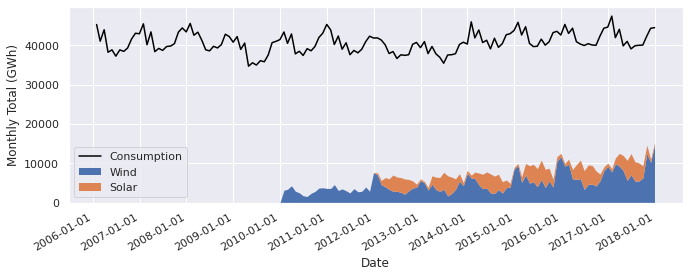

In [108]:
fig, ax = plt.subplots()
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

In [109]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily_df[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)


,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


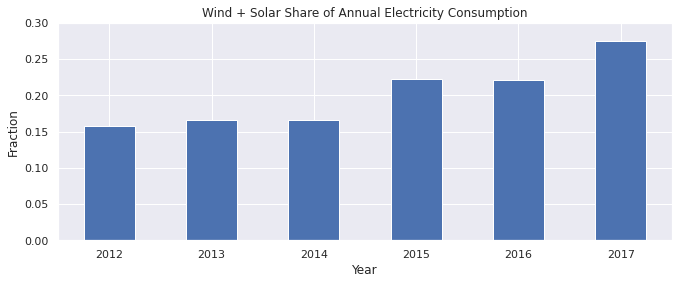

In [110]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);